In [9]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from astropy.io import ascii
from scipy import stats

In [2]:
data = ascii.read('/Users/samberek/Courses/1501project/data/table5/NGC1407_GC.cat')

In [3]:
print(data)

     ID          RA       DEC      RV  RV_err  RAD 
------------ --------- ---------- ---- ------ -----
  NGC1407_S1 55.031092 -18.499864 1436     12  4.93
  NGC1407_S2 55.052983 -18.594181 1883      7  0.87
  NGC1407_S3 55.060592 -18.592561 1509      5  0.98
  NGC1407_S4 55.074404 -18.552261 2008      6  2.19
  NGC1407_S5 55.217613 -18.502664 1966      5 10.63
  NGC1407_S6 54.986208 -18.603747 1951      6  3.86
  NGC1407_S7  55.05315 -18.607761 2090      8  1.67
  NGC1407_S8 55.193054 -18.454867 1572     11  11.1
  NGC1407_S9 55.064321 -18.564747 1861     11  1.25
 NGC1407_S10 55.058108   -18.5202 1539     10  3.63
         ...       ...        ...  ...    ...   ...
NGC1407_S364 54.954208 -18.567667 2355     10  5.47
NGC1407_S365 54.963417 -18.596917 1540     43  4.99
NGC1407_S366 54.995375 -18.588222 1562     23  3.11
NGC1407_S367 54.956875 -18.412583 2089     54 11.35
NGC1407_S368 54.956333 -18.560361 1758      8  5.42
NGC1407_S369 54.997625 -18.615611 1710     27  3.63
NGC1407_S370

In [4]:
los_vel = data['RV'] - 1779

SyntaxError: invalid syntax (<ipython-input-105-a0b14b79e8b2>, line 1)

In [100]:
print(data[348])
print(los_vel[348])

     ID          RA       DEC      RV  RV_err RAD 
------------ --------- ---------- ---- ------ ----
NGC1407_S349 55.105987 -18.605636 2688      2 3.56
909


In [74]:
print(np.min(los_vel))
print(np.max(los_vel))

-631
909


In [6]:
print(np.min(data['RAD']))
print(np.max(data['RAD']))

0.26
14.51


Text(0, 0.5, 'Dec')

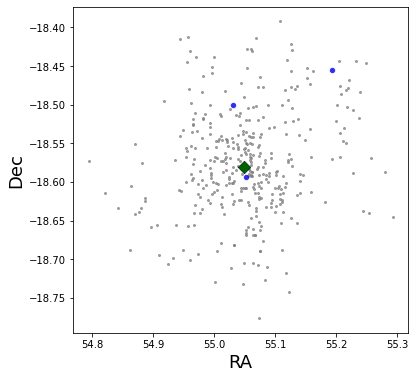

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(data['RA'], data['DEC'], s=4, c='grey', alpha=0.7)
plt.scatter(55.049417, -18.580111, s=80, c='darkgreen', marker='D', linewidths=0.5, edgecolors='black')
#check to see if RAD is radius from the center of the galaxy
# plt.scatter(data['RA'][7], data['DEC'][7], s=20, c='blue', alpha=0.7)
# plt.scatter(data['RA'][1], data['DEC'][1], s=20, c='blue', alpha=0.7)
# plt.scatter(data['RA'][0], data['DEC'][0], s=20, c='blue', alpha=0.7)
plt.xlabel('RA', fontsize=18)
plt.ylabel('Dec', fontsize=18)

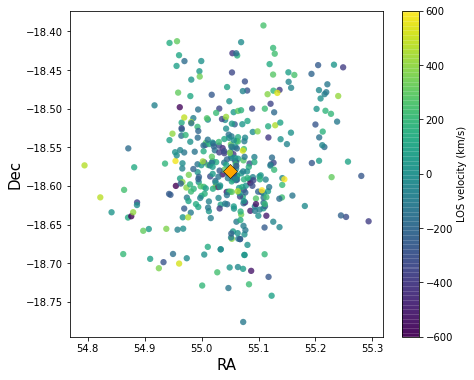

In [131]:
plt.figure(figsize=(7,6))
plt.scatter(55.049417, -18.580111, s=100, c='orange', marker='D', linewidths=0.5, edgecolors='black', zorder=5)
plt.scatter(data['RA'], data['DEC'], s=40, c=los_vel, alpha=0.8, linewidths=0, vmin=-600, vmax=600)
plt.colorbar(label='LOS velocity (km/s)')
plt.xlabel('RA', fontsize=15)
plt.ylabel('Dec', fontsize=15)
plt.savefig('/Users/samberek/Courses/1501project/results/prelim_1407/poslosvel.pdf')

In [116]:
#kernel density estimation of the line-of-sight velocity data

kernel = stats.gaussian_kde(los_vel)

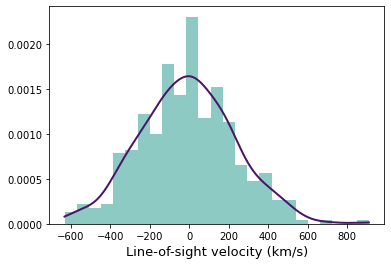

In [119]:
x = np.linspace(np.min(los_vel), np.max(los_vel), 1000)

plt.plot(x, kernel.evaluate(x), color='#481567FF', lw=2)
plt.hist(los_vel, density=True, color='#1F968BFF', alpha=0.5, bins=25)
plt.xlabel('Line-of-sight velocity (km/s)', fontsize=13)
plt.savefig('/Users/samberek/Courses/1501project/results/prelim_1407/losvelkde.pdf')

In [11]:
(const.G).to(u.kpc/u.M_sun*(u.km/u.s)**2)

<Quantity 4.30091727e-06 km2 kpc / (s2 solMass)>

In [92]:
#stan code
pos = np.sqrt((4.93**2)+20**2)
vel = np.sqrt((-343)**2)

M = 2.*np.pi*1e6*(100**3)
pot = -4.3009173*(1e-6)*M/(pos+100) 
epsilon = -(vel**2)/2. - pot
epsilon_tilde = epsilon*100 / (4.3009173*(1e-6)*M)

In [93]:
print(epsilon_tilde)
print(epsilon)
print(pot)
print(M) 
print(pos+100)

0.611517215713046
165253.11254639903
-224077.61254639903
6283185307179.586
120.59866257794422


In [94]:
#stan code
mult_one = (4.3009173*1e-6*M*30000)**(-1.5) / (np.sqrt(2.)*(2.*np.pi)**3)
mult_two = np.sqrt(epsilon_tilde) / (1.-epsilon_tilde)**2
bracket_one = (1.-2.*epsilon_tilde) * (8.*epsilon_tilde**2 -8.*epsilon_tilde-3)
bracket_two = 3*np.arcsin(np.sqrt(epsilon_tilde)) / np.sqrt(epsilon_tilde*(1-epsilon_tilde))

f_eps = mult_one * mult_two * (bracket_one+bracket_two)


In [95]:
print(mult_one)
print(mult_two)
print(bracket_one)
print(bracket_two)

print(f_eps)

3.9052790778801446e-21
5.18156306830538
1.092982748101819
5.526373831163183
1.339456580418558e-19


In [ ]:
#retry with G=1 units

pos = np.sqrt((5**2)+(10**2))
vel = np.sqrt((300**2)+(-200)**2+(100)**2)

M = 2.*np.pi*1e-6*(100**3)
pot = -4.3009173*(1e-6)*M/(pos+100) 
epsilon = -(vel**2)/2. - pot
epsilon_tilde = epsilon*100 / (-4.3009173*(1e-6)*M)

In [26]:
def tilde(a, rho, r, v):
    M = 2*np.pi*rho*a**3
    first = a/(r+a)
    second = (v**2*a)/(2*M) #G is 1 here
    return first-second


tilde(100, 1e-6, pos, vel/100)

-110.50902056825078